<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Backpropagation-Practice" data-toc-modified-id="Backpropagation-Practice-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Backpropagation Practice</a></span><ul class="toc-item"><li><span><a href="#Data-Science-Unit-4-Sprint-2-Assignment-2" data-toc-modified-id="Data-Science-Unit-4-Sprint-2-Assignment-2-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><em>Data Science Unit 4 Sprint 2 Assignment 2</em></a></span></li><li><span><a href="#Try-building/training-a-more-complex-MLP-on-a-bigger-dataset." data-toc-modified-id="Try-building/training-a-more-complex-MLP-on-a-bigger-dataset.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Try building/training a more complex MLP on a bigger dataset.</a></span></li><li><span><a href="#Stretch-Goals:" data-toc-modified-id="Stretch-Goals:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Stretch Goals:</a></span></li></ul></li></ul></div>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
import pandas as pd
import numpy as np

data = {
    'x1': [0, 0, 1, 0, 1, 1, 0],
    'x2': [0, 1, 0, 1, 0, 1, 0],
    'x3': [1, 1, 1, 0, 0, 1, 0],
    'y' : [0, 1, 1, 1, 1, 0, 0]
}

df = pd.DataFrame.from_dict(data)

In [2]:
print(df.shape)
df.head()

(7, 4)


,x1,x2,x3,y
0,0,0,1,0
1,0,1,1,1
2,1,0,1,1
3,0,1,0,1
4,1,0,0,1


In [3]:
X = df[['x1', 'x2', 'x3']].values

y = df['y'].values.reshape(7, 1)

X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 1, 1],
       [0, 0, 0]])

In [4]:
y

array([[0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0]])

In [5]:
class NeuralNetwork:
    
    def __init__(self, inputs = 3, hiddenNodes = 4, outputNodes = 1):
        self.inputs = inputs
        self.hiddenNodes = hiddenNodes
        self.outputNodes = outputNodes
        
        # initialize weights
        # Given we make a NN with the class defaults
        # If you consider 3 inputs, with each input connecting to 4 hidden nodes
        # then we'd have 3 X 4 total relationships between inputs and nodes.
        # You have to remember those relationships are where the weights come in
        # so we want to have a weight, that multiplies an input feeding into a
        # node for all 12 relationships. So we create a matrix of 3 X 4 weights
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
        
        # Now I need to figure out the relationships from my my hidden nodes
        # to my output nodes.  This is very similar, and I need to create a 
        # matrix of 4 X 1 to represent the 4 nodes feeding into one output.
        # Remember all this is leveraging how matrix multiplication can
        # compress multiple inputs, to one output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoidPrime(self, x):
        sx = self.sigmoid(x)
        return sx * (1 - sx)
    
    def feed_forward(self, X):
        
        # weightted sum
        self.hidden_sum = np.dot(X, self.weights1)
        
        # activating with sigmoid function
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # weighted sum #2, transforming hiddennodes by our weights to generate
        # the unactivated output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        #Final output, activate with sigmoid function
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        
        # note to future self: You are effectively processing this in the
        # reverse of your feed forward.  you want to figure out the error from
        # your output and your truth (y).  Then you need to step backwards
        # through each layer, find the error, transform it by the appropriate
        # derivative for that layer, and then eventually add that back to your
        # main weights to be used in the next feed_forward that is called. That
        # way your perceptron can learn from it's error
        self.o_error = y - o
        
        # using the derivative to transform error to be reintegrated
        self.o_delta = self.o_error * self.sigmoidPrime(self.output_sum)
        
        # z2 error: how far off were the output layer weights
        self.z2_error = self.o_delta.dot(self.weights2.T)
        
        # z2 delta: Transform the output layer error by the derivative
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.hidden_sum)
        
        # adjusting the input -> hidden layer weights
        self.weights1 += X.T.dot(self.z2_delta)
        
        # adjusting the hidden -> output layer weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
    def train(self, X, y):
        
        # getting the output of a single feed_forward
        o = self.feed_forward(X)
        
        # sending everything to calculate error and back propagate
        self.backward(X, y, o)

In [6]:
#okay lets train it a few times

nn = NeuralNetwork()

for i in range(10000):
    nn.train(X, y)
    
print('final output:', nn.activated_output)
print('validation:', y)

final output: [[0.0018491 ]
 [0.98782732]
 [0.98999978]
 [0.98902987]
 [0.99171699]
 [0.01494603]
 [0.0176874 ]]
validation: [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


In [7]:
# loading in through tensor flow, because that seems the easiest
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

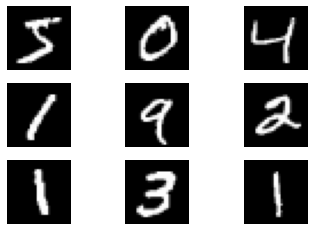

In [8]:
#verify it loaded by printing out a couple pictures
import matplotlib.pyplot as plt

for i in range (9):
    
    plt.subplot(330 + 1 + i)
    
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
    plt.axis('off')
    
plt.show();

In [11]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [14]:
# hmm a three dimensional array.  Makes sense, so 60k entries
X_train.shape

(60000, 28, 28)

In [23]:
# I gave it a shot with my NN, but np.exp kept dying.  So I'm giving this a shot
# with tensorflow, since they have a more robust model.  If I can get it to 
# work with tensorflow, I may try flattening my inputs and feeding it into my
# own model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

#sequential is recommended by Tensorflow docs for image classification
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 1s 484us/step - loss: 5.1594 - accuracy: 0.8908 - val_loss: 6.5816 - val_accuracy: 0.8815
Epoch 2/10
1875/1875 [==============================] - 1s 492us/step - loss: 5.1829 - accuracy: 0.8915 - val_loss: 5.6372 - val_accuracy: 0.8978
Epoch 3/10
1875/1875 [==============================] - 1s 488us/step - loss: 5.1816 - accuracy: 0.8918 - val_loss: 7.0961 - val_accuracy: 0.8820
Epoch 4/10
1875/1875 [==============================] - 1s 487us/step - loss: 5.0864 - accuracy: 0.8912 - val_loss: 6.1706 - val_accuracy: 0.8983
Epoch 5/10
1875/1875 [==============================] - 1s 487us/step - loss: 5.1276 - accuracy: 0.8931 - val_loss: 5.7585 - val_accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 1s 485us/step - loss: 5.1335 - accuracy: 0.8913 - val_loss: 6.9418 - val_accuracy: 0.8746
Epoch 7/10
1875/1875 [==============================] - 1s 478us/step - loss: 5.2265 - accuracy: 0.8926 - val_loss: 5.3318 -

## Stretch Goals: 

- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?